# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1YUhTYLmC25qFu3MS2I5mwiObwXgYQ1SJ')

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,4


In [4]:
print("Data Frame Shape:", df.shape)

Data Frame Shape: (2512, 17)


In [5]:
# Cek missing value dan duplikasi datanya
print(f'Missing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')

Missing values: 0
Duplicated values: 0


In [6]:
# Melihat distribusi kelas (hasil clustering)
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())


Cluster Distribution:
Cluster
1    859
0    739
4    526
3    293
2     95
Name: count, dtype: int64


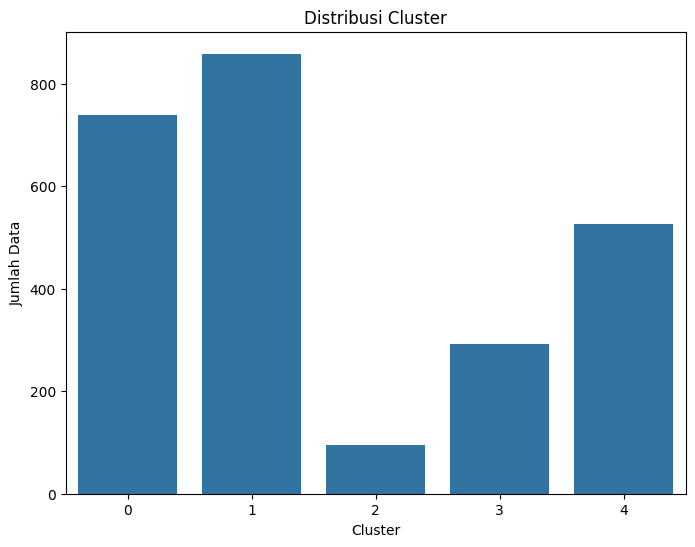

In [7]:
# Visualisasi distribusi cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Variabel target adalah hasil clustering (Cluster)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [9]:
# Mengidentifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [10]:
# Menghapus kolom yang tidak relevan untuk model klasifikasi
cols_to_drop = ['TransactionID', 'AccountID', 'IP Address', 'TransactionDate', 'PreviousTransactionDate']
for col in cols_to_drop:
    if col in numeric_features:
        numeric_features.remove(col)
    elif col in categorical_features:
        categorical_features.remove(col)

X = X.drop(cols_to_drop, axis=1)

In [11]:
# Membuat preprocessor untuk kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [12]:
# Membagi dataset menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Fitur numerik: {numeric_features}")
print(f"Fitur kategorikal: {categorical_features}")

Jumlah data latih: 2009
Jumlah data uji: 503
Fitur numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Fitur kategorikal: ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation']


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [13]:
# Membangun pipeline untuk Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [14]:
# Membangun pipeline untuk Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [15]:
# Melatih model Decision Tree
dt_pipeline.fit(X_train, y_train)
print("Model Decision Tree telah dilatih.")

Model Decision Tree telah dilatih.


In [16]:
# Melatih model Random Forest
rf_pipeline.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")

Model Random Forest telah dilatih.


1. **Decision Tree**:
   - Algoritma supervised learning yang dapat digunakan untuk klasifikasi
   - Membuat keputusan berdasarkan fitur-fitur dengan menciptakan struktur pohon
   - Kelebihan: Mudah diinterpretasi, dapat menangani data numerik dan kategorikal
   - Kelemahan: Rentan terhadap overfitting

2. **Random Forest**:
   - Merupakan metode ensemble dari beberapa pohon keputusan
   - Meningkatkan akurasi dan mengurangi overfitting dengan mengambil "suara terbanyak" dari kumpulan pohon keputusan
   - Kelebihan: Performanya lebih baik daripada Decision Tree tunggal, lebih tahan terhadap overfitting
   - Kelemahan: Kompleksitas komputasi lebih tinggi, interpretasi yang lebih sulit

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [17]:
# Evaluasi model Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Evaluasi Model Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

Evaluasi Model Decision Tree:
Accuracy: 0.9841
Precision: 0.9844
Recall: 0.9841
F1-score: 0.9836


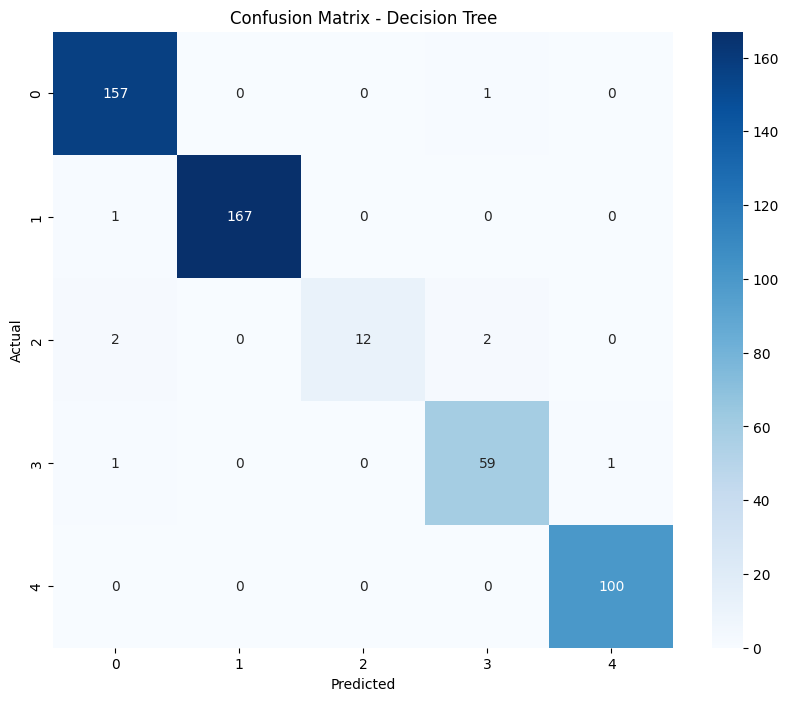

In [18]:
# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Cluster'].unique()), yticklabels=sorted(df['Cluster'].unique()))
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Classification Report untuk Decision Tree
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       158
           1       1.00      0.99      1.00       168
           2       1.00      0.75      0.86        16
           3       0.95      0.97      0.96        61
           4       0.99      1.00      1.00       100

    accuracy                           0.98       503
   macro avg       0.98      0.94      0.96       503
weighted avg       0.98      0.98      0.98       503



In [20]:
# Evaluasi model Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nEvaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")


Evaluasi Model Random Forest:
Accuracy: 0.9602
Precision: 0.9607
Recall: 0.9602
F1-score: 0.9594


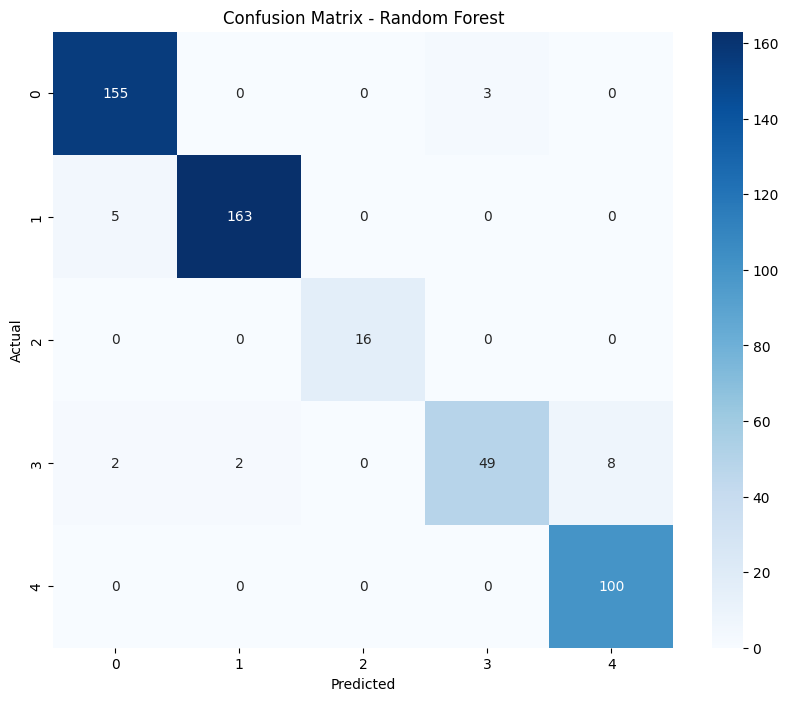

In [21]:
# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Cluster'].unique()), yticklabels=sorted(df['Cluster'].unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Classification Report untuk Random Forest
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       158
           1       0.99      0.97      0.98       168
           2       1.00      1.00      1.00        16
           3       0.94      0.80      0.87        61
           4       0.93      1.00      0.96       100

    accuracy                           0.96       503
   macro avg       0.96      0.95      0.96       503
weighted avg       0.96      0.96      0.96       503



- Decision Tree unggul dalam akurasi keseluruhan (98% vs. 96%) dan lebih baik dalam mengenali kelas mayoritas serta kelas dengan distribusi yang seimbang.
- Random Forest lebih baik dalam mengenali kelas minoritas (kelas 2), yang sering kali sulit diprediksi oleh Decision Tree karena risiko overfitting.
- Decision Tree cenderung overfit, sedangkan Random Forest lebih generalisasi, sehingga perbedaannya akan terlihat saat diuji pada data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [23]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [24]:
# Grid Search untuk Random Forest
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

In [25]:
# Melatih Grid Search
print("Melakukan Grid Search untuk Random Forest...")
grid_search_rf.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params_rf = grid_search_rf.best_params_
print(f"Parameter terbaik untuk Random Forest: {best_params_rf}")
best_rf = grid_search_rf.best_estimator_

Melakukan Grid Search untuk Random Forest...
Parameter terbaik untuk Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
# Evaluasi model Random Forest setelah tuning
y_pred_rf_tuned = best_rf.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned, average='weighted')
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned, average='weighted')
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print("\nEvaluasi Model Random Forest setelah Tuning:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1-score: {f1_rf_tuned:.4f}")


Evaluasi Model Random Forest setelah Tuning:
Accuracy: 0.9602
Precision: 0.9607
Recall: 0.9602
F1-score: 0.9594


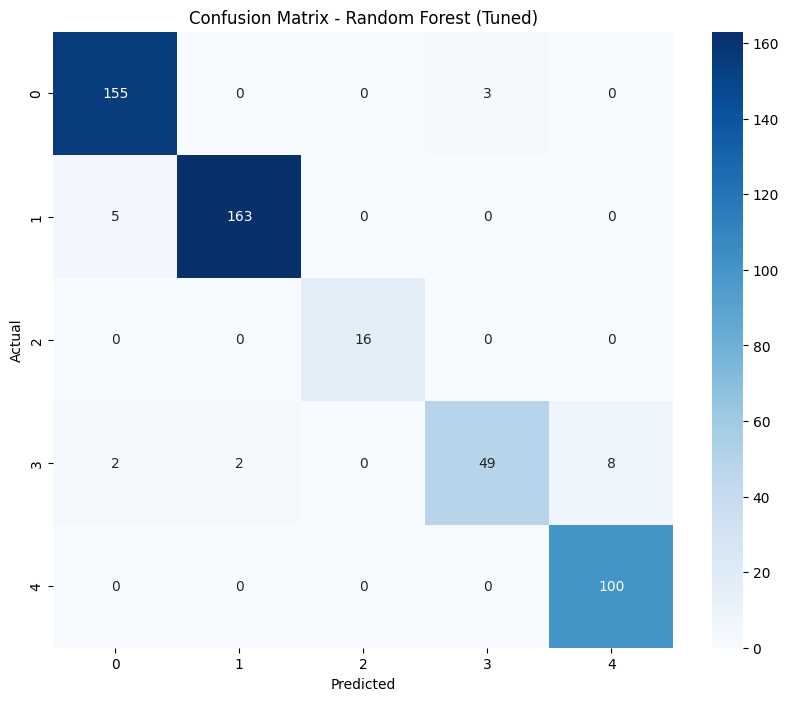

In [27]:
# Confusion Matrix untuk Random Forest setelah tuning
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Cluster'].unique()), yticklabels=sorted(df['Cluster'].unique()))
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Classification Report untuk Random Forest setelah tuning
print("\nClassification Report - Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf_tuned))


Classification Report - Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       158
           1       0.99      0.97      0.98       168
           2       1.00      1.00      1.00        16
           3       0.94      0.80      0.87        61
           4       0.93      1.00      0.96       100

    accuracy                           0.96       503
   macro avg       0.96      0.95      0.96       503
weighted avg       0.96      0.96      0.96       503



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# Evaluasi dan Perbandingan Random Forest Sebelum dan Sesudah Tuning

## Perbandingan Hasil Evaluasi
| Metric            | Random Forest (Default) | Random Forest (Tuned) | Perubahan |
|------------------|------------------------|------------------------|-----------|
| Accuracy         | 96%                     | 96%                     | Tidak berubah |
| Macro Avg Prec.  | 0.96                    | 0.96                    | Tidak berubah |
| Macro Avg Recall | 0.95                    | 0.95                    | Tidak berubah |
| Macro Avg F1     | 0.96                    | 0.96                    | Tidak berubah |

## Identifikasi Kelemahan Model
- **Kelas 3 memiliki recall rendah (0.80)**, menunjukkan bahwa model kesulitan mengenali kelas ini.
- **Kelas 4 memiliki precision 0.93**, yang berarti beberapa sampel salah diklasifikasikan sebagai kelas lain.
- **Tidak ada tanda overfitting**, tetapi ada indikasi underfitting pada kelas 3.

## Rekomendasi Tindakan Lanjutan
1. **Meningkatkan recall kelas 3:**
   - Menggunakan **SMOTE** untuk oversampling.
   - Menyesuaikan **threshold prediksi** dengan Precision-Recall Curve.
2. **Meningkatkan precision kelas 4** dengan class weighting.
3. **Mencoba model lain** seperti **XGBoost atau Gradient Boosting**.
4. **Mengumpulkan data tambahan** jika dataset terlalu kecil.